In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
# 500000 train samples size of 32x32 and 3 color chanels

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

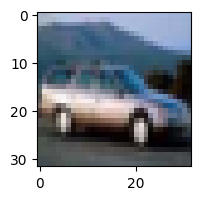

In [4]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[4])

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]
# first five samples index 6 , index 9 ...

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
classes[6]

'frog'

In [10]:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

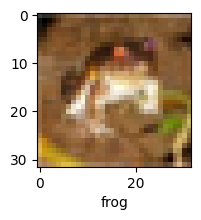

In [11]:
plot_sample(X_train,y_train,0)

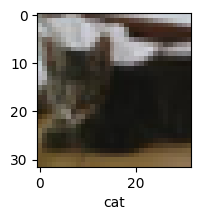

In [12]:
plot_sample(X_train,y_train,9)

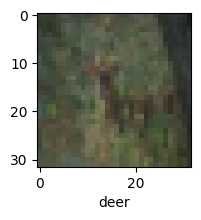

In [13]:
plot_sample(X_train,y_train,10)

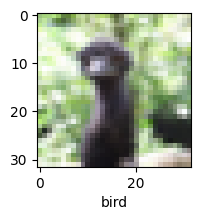

In [14]:
plot_sample(X_train,y_train,55)

In [15]:
X_train[0]/255
# normilzing the image pixels by dividing the image pixels by 255 to be a range (0 & 1)

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', # whenever our y is directly a value then sparse is the best to choose but if its one hot encoded we will use "categorical"
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 159s 101ms/step - loss: 1.8135 - accuracy: 0.3512
Epoch 2/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.6232 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.5417 - accuracy: 0.4559
Epoch 4/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.4813 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.4312 - accuracy: 0.4972


In [18]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 30ms/step - loss: 1.4661 - accuracy: 0.4808


[1.466093897819519, 0.48080000281333923]

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.49      0.55      1000
           1       0.61      0.64      0.62      1000
           2       0.36      0.42      0.38      1000
           3       0.31      0.54      0.39      1000
           4       0.58      0.23      0.33      1000
           5       0.59      0.17      0.26      1000
           6       0.53      0.53      0.53      1000
           7       0.40      0.71      0.51      1000
           8       0.57      0.69      0.62      1000
           9       0.68      0.41      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.47     10000
weighted avg       0.52      0.48      0.47     10000



In [20]:
cnn = models.Sequential([
         #CNN
         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)), # --> detecting the features in the images
         layers.MaxPooling2D((2,2)),

         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'), # --> detecting the features in the images
         layers.MaxPooling2D((2,2)),

         #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [21]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.6179 - accuracy: 0.4047
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2815 - accuracy: 0.5356
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1624 - accuracy: 0.5841
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0854 - accuracy: 0.6108
Epoch 5/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.0248 - accuracy: 0.6375
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9610 - accuracy: 0.6596
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9141 - accuracy: 0.6775
Epoch 8/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8701 - accuracy: 0.6934
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8310 - accuracy: 0.7083
Epoch 10/10
1563/1563 [==============================] - 48s 31m

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9756 - accuracy: 0.6696


[0.975559651851654, 0.6696000099182129]

In [34]:
y_test = y_test.reshape(-1,)
y_test[:5]
# converting the matrix into 1D of the first matrix we will use (-1,) since the y_test is a 2D array 1D is good enough for our classification

array([3, 8, 8, 0, 6], dtype=uint8)

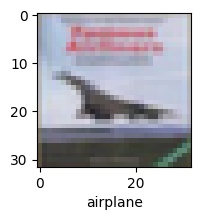

In [26]:
plot_sample(X_test,y_test,3)

In [27]:
y_predict = cnn.predict(X_test)
y_predict[:5]

313/313 [==============================] - 3s 8ms/step


array([[1.31128915e-02, 1.96217410e-02, 1.06234085e-02, 6.65628254e-01,
        1.39199104e-03, 1.54670954e-01, 3.64651228e-03, 1.80786432e-04,
        1.19934723e-01, 1.11888126e-02],
       [3.03652324e-03, 4.77872510e-03, 1.46639968e-06, 5.44695311e-08,
        4.25447899e-09, 1.86010790e-10, 4.25383995e-08, 5.83057821e-12,
        9.91720080e-01, 4.63118486e-04],
       [3.68922614e-02, 2.30418697e-01, 2.84058694e-03, 1.04894908e-03,
        2.15408189e-04, 9.07610447e-05, 7.07029481e-04, 6.35702381e-05,
        7.07584321e-01, 2.01383755e-02],
       [3.86615358e-02, 1.02786226e-02, 4.41590510e-03, 1.26378087e-04,
        1.06970849e-03, 6.15637191e-06, 1.14688568e-03, 2.07041057e-06,
        9.42592680e-01, 1.70001539e-03],
       [1.52187404e-05, 4.10642751e-05, 1.33771366e-02, 2.27974162e-01,
        2.75268167e-01, 2.19765622e-02, 4.59979713e-01, 3.30249750e-04,
        9.64696403e-04, 7.28271552e-05]], dtype=float32)

In [28]:
np.argmax([5,12,1,2])

1

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

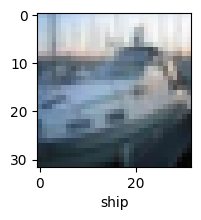

In [31]:
plot_sample(X_test,y_test,2)

In [32]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [33]:
classes[y_classes[2]]
# as we can since our classes array of the first 5 samples [3, 8, 8, 8, 4]
# and when i tried the test first 5 samples [3, 8, 8, 0, 6] we got 3 correct predictions since our model got around 70% accuracy

'ship'